<a href="https://colab.research.google.com/github/devthumos/Alura_Imersao_Dados_04/blob/main/Aula_02_Desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imersão de Dados 04 - Aula 02

<h2><i>Tratamento de dados e primeiros gráficos</i></h2>

<hr>
<hr>

# Desafios Aula 02

- Criar uma escala de valores em milhões
- Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)
- Preço do metro quadrado por bairro e plotar em um gráfico ideal [Esse aki tem que estudar o groupby]
- Explorar as bibliotecas de visualizações e colocar as suas conclusões
- Pesquisar uma visualização para analisar os quartis, mediana e outliers

Célula necessária para execução dos desafios

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import pandas as pd
import numpy as np
import random

file_path = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dataset = pd.read_csv(file_path)

dataset[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = dataset["Valor"].str.split(expand=True) ## Nesse caso é melhor colocar unique para aparecer os valores None

dataset_vendas = dataset[dataset.Tipo_anuncio.isnull()]
dataset_vendas.Valor_anuncio = dataset_vendas.Valor_anuncio.str.replace(".", "").astype("float")

dataset_vendas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.0,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.0,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.0,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.0,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.0,None
...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1500000.0,None
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665000.0,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2300000.0,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1050000.0,None


## Desafio 01 - Criar uma escala de valores em milhões

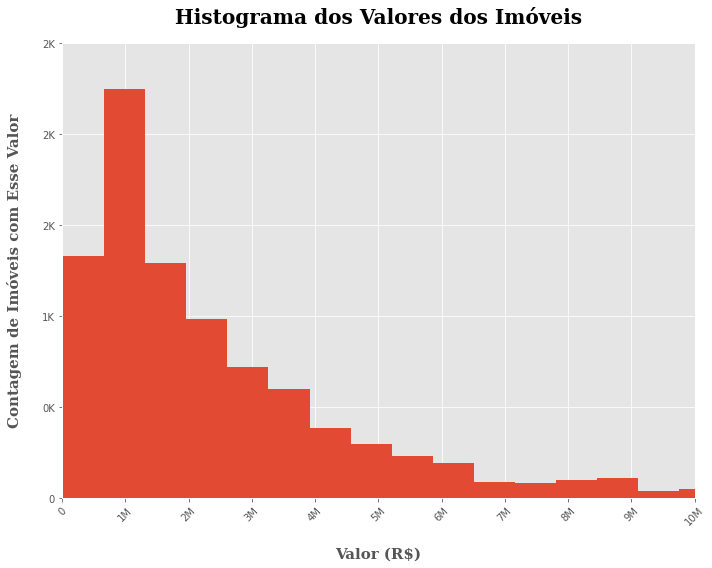

In [ ]:
# Função para formatar o eixo x
def formatter_x(data_value, index):
  formatter = f"{(data_value*0.000_001):.0f}M" if data_value != 0 else 0
  return formatter

# Função para formatar o eixo y
def formatter_y(data_value, index):
  formatter = f"{(data_value*0.001):1.0f}K" if data_value != 0 else 0
  return formatter

# Propriedades dos textos
dict_font1 = {
    "fontsize": 15,
    "fontweight": "bold",
    "fontfamily": "serif"
}
dict_font2 = {
    "fontsize": 20,
    "fontweight": "bold",
    "fontfamily": "serif"
}


plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(10,8))

# Definindo o intervalo de valores mostrados, o limite do eixo x e o limite do eixo y
plt.xticks(np.arange(0, 10_000_001, 1_000_000))
plt.xlim((0, 10_000_000))
plt.ylim((0, 2500))

# plotando o histograma
ax.hist(data=dataset_vendas, x="Valor_anuncio", bins=100)

## Alterando título, xlabel, ylabel e rotação dos xticks
ax.set_title(label="Histograma dos Valores dos Imóveis", fontdict=dict_font2, pad=20)
plt.xlabel(xlabel="Valor (R$)", fontdict=dict_font1, labelpad=20)
plt.ylabel(ylabel="Contagem de Imóveis com Esse Valor", fontdict=dict_font1, labelpad=20)
plt.xticks(rotation=45)

## Formatando as labels
ax.xaxis.set_major_formatter(tick.FuncFormatter(formatter_x))
ax.yaxis.set_major_formatter(tick.FuncFormatter(formatter_y))


plt.tight_layout()
plt.show()




## Desafio 02 - Deixar o gráfico do histograma de valores legível (altera labels, cores, título, escala)

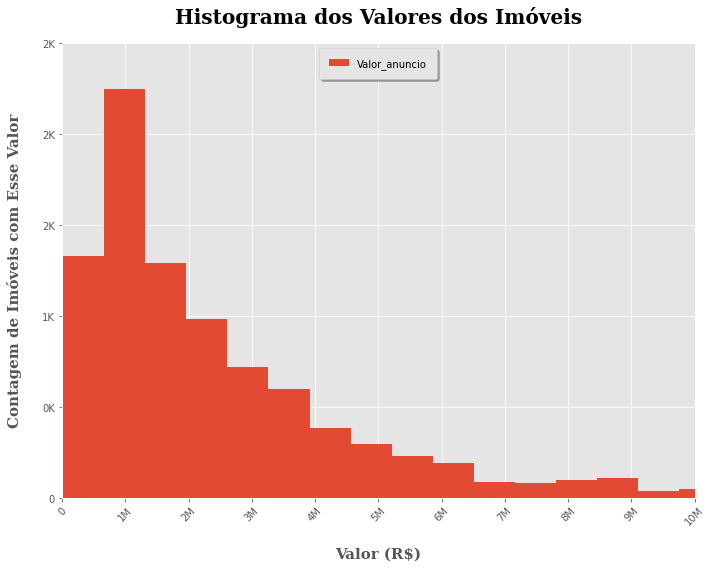

In [ ]:
# Função para formatar o eixo x
def formatter_x(data_value, index):
  formatter = f"{(data_value*0.000_001):.0f}M" if data_value != 0 else 0
  return formatter

# Função para formatar o eixo y
def formatter_y(data_value, index):
  formatter = f"{(data_value*0.001):1.0f}K" if data_value != 0 else 0
  return formatter

# Propriedades dos textos
dict_font1 = {
    "fontsize": 15,
    "fontweight": "bold",
    "fontfamily": "serif"
}
dict_font2 = {
    "fontsize": 20,
    "fontweight": "bold",
    "fontfamily": "serif"
}


plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(10,8))

# Definindo o intervalo de valores mostrados, o limite do eixo x e o limite do eixo y
plt.xticks(np.arange(0, 10_000_001, 1_000_000))
plt.xlim((0, 10_000_000))
plt.ylim((0, 2500))

# plotando o histograma
ax.hist(data=dataset_vendas, x="Valor_anuncio", bins=100)

# Alterando título, xlabel, ylabel e rotação dos xticks e legenda
ax.set_title(label="Histograma dos Valores dos Imóveis", fontdict=dict_font2, pad=20)
plt.xlabel(xlabel="Valor (R$)", fontdict=dict_font1, labelpad=20)
plt.ylabel(ylabel="Contagem de Imóveis com Esse Valor", fontdict=dict_font1, labelpad=20)
plt.xticks(rotation=45)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc="upper center")

# Formatando as labels
ax.xaxis.set_major_formatter(tick.FuncFormatter(formatter_x))
ax.yaxis.set_major_formatter(tick.FuncFormatter(formatter_y))


plt.tight_layout()
plt.show()


## Desafio 03 - Preço do metro quadrado por bairro e plotar em um gráfico ideal

In [ ]:
dataset_vendas["Valor/Metro_Quadrado"] = dataset_vendas.Valor_anuncio / dataset_vendas.Metragem  # Inserindo a nova coluna "Valor/Metro_Quadrado"
dataset_vendas.groupby("Bairro")["Valor/Metro_Quadrado"].mean().sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Bairro
Vila Guaca                      80000.000000
Jardim América                  24088.572449
Jardim Ampliação                20051.041667
Jardim Europa                   19962.687870
Vila Nova Conceição             17614.033886
                                    ...     
Jardim Brasília (Zona Leste)     1055.009107
Jardim Itapemirim                1054.500000
Vila Aurea                        906.593407
Jardim Vera Cruz(Zona Leste)      544.755329
Sítio Represa                      78.378378
Name: Valor/Metro_Quadrado, Length: 697, dtype: float64

In [ ]:
# Pegando os índexes
dataset_vendas.groupby("Bairro")["Valor/Metro_Quadrado"].mean().sort_values(ascending=False).head(10).index

Index(['Vila Guaca', 'Jardim América', 'Jardim Ampliação', 'Jardim Europa',
       'Vila Nova Conceição', 'Jardim Teresa', 'Jardim Luzitânia',
       'Jardim Paulista', 'Jardim Paulistano', 'Itaim Bibi'],
      dtype='object', name='Bairro')

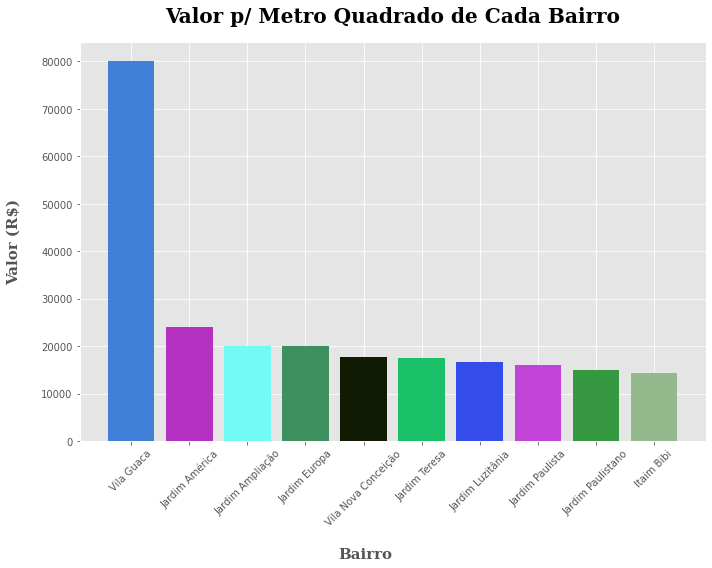

In [ ]:
# Definindo os valores do eixo x e y
y = dataset_vendas.groupby("Bairro")["Valor/Metro_Quadrado"].mean().sort_values(ascending=False).head(10)
x = dataset_vendas.groupby("Bairro")["Valor/Metro_Quadrado"].mean().sort_values(ascending=False).head(10).index

# Escolhendo 3 valores aleatórios para cada tupla rgb a cada vez que a célula é executada
colors = [(random.random(), random.random(), random.random()) for _ in range(0, 10)]

# Propriedades de texto
fontdict1 = {
    "fontsize": 15,
    "fontweight": "bold",
    "fontfamily": "serif"
}
fontdict2 = {
    "fontsize": 20,
    "fontweight": "bold",
    "fontfamily": "serif"
}


plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(10,8))

# Plotando o gráfico de barras
ax.bar(height=y, x=x, color=colors )

# Alterando o título, labels e rotação dos ticks
ax.set_title(label="Valor p/ Metro Quadrado de Cada Bairro", fontdict=fontdict2, pad=20)
plt.ylabel(ylabel="Valor (R$)", labelpad=20, fontdict=fontdict1)
plt.xlabel(xlabel="Bairro", labelpad=20, horizontalalignment="right", fontdict=fontdict1)
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

## Desafio 04 - Explorar as bibliotecas de visualizações e colocar as suas conclusões

## Desafio 05 - Pesquisar uma visualização para analisar os quartis, mediana e outliers

In [ ]:
## Sei que utiliza o bloxplot